# 10 - Nettverk (Web)

## 10.1 Repetisjon HTTP

Med python kan man enkelt bruke forskjellige nettverksprotokoller.<br>
Stor mulighet for å skripte forespørsler og dermed automatisere f.eks testing over nettverket.

Først ser vi på HTTP som vi kan bruke til å snakke med webservere.

- Kan sende og motta forespørsler over HTTP med Python.
- HTTP Metoder
    - GET    - Hent data/nettside
    - POST   - Last opp/send data
    - HEAD   - Kun hent HTTP-header fra webserver
    - PUT    - Last opp data/oppdatere enkelte ressurser
    - PATCH  - Endre enkelte felter/data for en gitt ressurs
    - DELETE - Slett data

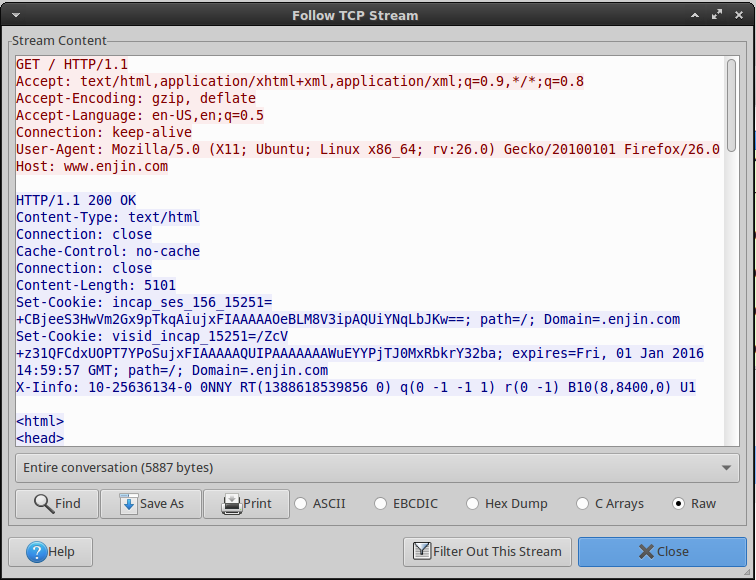

Flere moduler for HTTP:
- Urllib
- Urllib2
- Urllib3
- Requests for HTTP
- Twisted

## 10.2 Surfing på web med urllib
Urllib-modulen tilbyr forskjellige funksjoner for å behandle URLer og tilhører pythons standardbibliotek.
`request.urlopen` gjør selve åpningen, og returnerer et objekt som ligner en fil, med f.eks. read(), readline() og readlines().


In [ ]:
from urllib import request

sock = request.urlopen('https://www.python.org')
webpage = sock.read()
sock.close()

print(webpage[:30]) # Svaret kommer som bytestreng uten kjent enkoding
print()
print(webpage.decode('utf-8')[:30]) # Som regel utf-8

### Videre metoder i urllib

Noen forskjeller fra filer:
- Ingen seek()
- geturl() returnerer url for kallet
- headers inneholder informasjon om server og svaret

In [ ]:
import urllib

with urllib.request.urlopen('https://www.python.org') as f:
    print(f.geturl() + '\n')
    print('Server: ' + f.headers['Server'])
    print('Content-Type: ' + f.headers['Content-Type'])

### Utvidet bruk av urllib

Urllib kan også gjøre mer kompliserte forespørsler, hvor man konfigurerer mer av det man ønsker å sende.

Man lager da først et Request-objekt, og setter headers etter ønske. Aktuelle kandidater kan være f.eks. 'User-Agent', 'Referer' og 'Accept-Encoding'.

In [ ]:
from urllib.request import urlopen, Request

request = Request('https://www.python.org')
request.add_header('User-Agent', 'Mozilla/5.0 Firefox/2.0.0.11')

print(urlopen(request).read().decode('utf-8')[:500])

## 10.2 Oppgaver: Hent websider (GET)

* Bruk urllib for å laste ned en nettside du selv velger, og print innholdet.
* Velg gjerne en nettside som har veldig lite tekst, slik at det ikke blir så mye HTML-kode å skrive ut.
* Print også statuskode og headers.


* Alternativt kan du starte scriptet "webserver" med Python, som ligger i kursfilene
    * flask --app webserver run
* Da skal du kunne besøke http://localhost:5000.

## 10.3 http.server

- Modul fra standardbiblioteket for å sette opp en enkel webserver
- Kan brukes til å gjøre filer tilgjengelig over nettverket
- Veldig enkelt å sette opp
    1. Gå til en ønsket mappe du vil gjøre tilgjengelig over HTTP
    2. Kjør modulen fra kommandolinja
        - For Windows: `py -3 -m http.server <PORT>`
        - For Linux: `python3 -m http.server <PORT>`
    3. Besøk `http://<Din IP-addresse>:<PORT>` for å aksessere filene


## 10.3 Oppgaver: Hent noen filer fra din egen webserver

* Bruk http.server til å gjøre en mappe tilgjengelig over nettverket.
* Besøk webserveren med nettleseren din og last ned noen filer manuelt.
* Bruk python og urllib til å laste ned filer fra webserveren, og skrive de til disk med riktig filnavn

## 10.4 Mer avansert HTTP

La oss teste ut andre HTTP-metoder mot nettsider!

- For å kunne sende data til nettsider, må man bestemme seg for et format man vil sende.
    - Kan sende hva som helst av tekst.
    - Finnes flere formater.
    - Et populært valg er **JSON**.
    - Andre formater: XML, form-data, raw
- API

### JSON
Javascript Object Notation

- En måte å formidle datastrukturer i tekst.
- Brukes blant annet for å la websider hente data for å oppdatere deler av en webside da det er lett å parse i javascript.
- Brukes også i webapi for å levere data.
- Python har en JSON modul for å tolke JSON-strenger til datastrukturer og for å serialisere strukturer til JSON.


In [ ]:
import json
my_dict= {'editor': 'Emacs', 'OS': 'Windows', 'Drink': 'Coffee', "Number": 1337}
print(my_dict, type(my_dict))
print()

json_string = json.dumps(my_dict)
print(json_string, type(json_string))
print()

new_dict = json.loads(json_string)
print(new_dict, type(new_dict))

### Requests
- Det finnes utrolig mange ulike HTTP-moduler.
- Den som blir mest brukt (og som for mange er den nye standarden) er **requests**.
    - "HTTP for Humans"
    - Ikke i standardbiblioteket.
    - Må installeres gjennom **pip**.
    - Et enklere bibliotek for å gjøre http-forespørsler. 
    - Requests er bygget på toppen av urllib3.

- Har mye funksjonalitet.
- Kan enkelt sende mange typer forespørsler.
- Returnerer et Response-objekt når man gjør en request.


- GET - `requests.get(<URL>)`
- POST - `requests.post(<URL>, data=<DATA>)`
- DELETE - `requests.delete(<URL>)`
- osv..

In [ ]:
import requests
import json
r = requests.get('https://api.github.com/events')
print(r.headers)

print(r.headers["server"])
print(r.status_code)

In [ ]:
print(len(r.json()))

Bruk feltet under til å se på resultatet i r, se om du kan liste ut brukernavnet for hver hendelse.

Tips: For-løkker, keys(), type(variabel), r.json()

In [ ]:
d = r.json()

<br>
POST-request er også veldig lett med requests

In [ ]:
data = {"dag":"mandag", "sjokolade":"Kvikk-lunsj"}

r = requests.post('http://httpbin.org/post', data=data)
d = r.json()
print(r.status_code, r.reason)
print(d["url"])
print(d["headers"])
print(d["form"])

## 10.4 Oppgaver: Bruke API

Scriptet api.py kan brukes til å starte en enkel api tjeneste med Fastapi.

Fastapi er en enkel og rask måte å sette opp et api på i Python.
Dokumentasjon https://fastapi.tiangolo.com/ 

For å kjøre tjenesten bruker vi her en minimal webserver kalt Uvicorn.  

Gå til script mappen og start


In [ ]:
uvicorn api:app


Du vil da få et enkelt api kjørende på port 8000.
- http://localhost:8000 
- http://localhost:8000/docs for gui

Api'et bruker text.txt fila vi brukte i filhånterings modulen av kurset.

Get funkjsonen leser fra fila og put appender til fila.

- Gå til apiet sitt gui og prøv funksjonene
- Skriv Python kode for å kjøre get
- Utvid Put funksjonen til å kunne velge mellom append og write til fil

### Ekstra øvelse: Wikipedia-søk
Wikipedia har et API for å kjøre spørringer mot siden. Øvingen går ut på å lage et script som bruker requests for å gjøre søk.
 - Referanse: https://en.wikipedia.org/w/api.php
 - Eksempel: https://en.wikipedia.org/w/api.php?action=opensearch&search=søkestreng
 
 - Etter å ha listet ut sidene som treffer søkestrengen bruk parse-apiet for å finne de sidene som finnes på norsk. (langlinks)
   https://en.wikipedia.org/w/api.php?action=parse&page=Cube&prop=langlinks

 - Bruk argparse for å ta inn søkestrengen, f.eks med  --query
 - Gjør det mulig å velge språk med –lang
 - Husk at requests.get lar deg spesifisere en dict med parametre.
   requests.get("https://en.wikipedia.org/w/api.php",params={"action":"opensearch","search":my_search})

Tips: 
 - Hvis du har flere lists/array du vil behandle samtidig: Se på zip()
 - Wikipedia formaterer api-resultat litt forskjellig. Legg til format=json for maskinlesbar og format=jsonfm for pretty-print.